In [1]:
import pandas as pd

import numpy as np

Profitability

In [2]:
np.set_printoptions(suppress=True)

In [3]:
df = pd.read_csv("Data Exercise - Data.csv")

In [4]:
df

,Date,TimeOfDay,Spot,BuyTrader,SellTrader
0,03/01/2022,09:32:05,99.96,3,0
1,03/01/2022,09:34:11,99.98,4,5
2,03/01/2022,09:34:29,99.97,4,5
3,03/01/2022,09:34:44,99.96,4,0
4,03/01/2022,09:39:02,99.88,3,1
...,...,...,...,...,...
120243,30/12/2022,15:50:09,115.70,2,0
120244,30/12/2022,15:50:39,115.73,3,0
120245,30/12/2022,15:51:31,115.74,2,4
120246,30/12/2022,15:56:58,115.86,2,0


In [5]:

unique_traders = sorted(set(df["BuyTrader"].unique()).union(set(df["SellTrader"].unique())))


buy_counts_daily = df.groupby("Date")["BuyTrader"].value_counts().unstack()


sell_counts_daily = df.groupby("Date")["SellTrader"].value_counts().unstack()


buy_counts_daily = buy_counts_daily.reindex(columns=unique_traders)
sell_counts_daily = sell_counts_daily.reindex(columns=unique_traders)


net_positions_daily = buy_counts_daily.subtract(sell_counts_daily, fill_value=0)
net_positions_daily.fillna(0,inplace=True)


In [6]:
net_positions_daily

BuyTrader,0,1,2,3,4,5,6
Date,,,,,,,
01/02/2022,-40.0,0.0,0.0,40.0,0.0,0.0,0.0
01/03/2022,-39.0,0.0,0.0,49.0,0.0,0.0,-10.0
01/04/2022,-45.0,0.0,0.0,45.0,0.0,0.0,0.0
01/06/2022,-38.0,0.0,0.0,48.0,0.0,0.0,-10.0
01/07/2022,-62.0,0.0,0.0,52.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...
31/01/2022,-35.0,0.0,0.0,35.0,0.0,0.0,0.0
31/03/2022,-54.0,0.0,0.0,44.0,0.0,0.0,10.0
31/05/2022,-44.0,0.0,0.0,34.0,0.0,0.0,10.0


In [7]:
non_zero_days_per_trader = (net_positions_daily != 0).sum()
non_zero_days_per_trader

BuyTrader
0    251
1      0
2      0
3    251
4      0
5      0
6    115
dtype: int64

In [8]:
net_positions = net_positions_daily.sum()
net_positions

BuyTrader
0   -10575.0
1        0.0
2        0.0
3    10570.0
4        0.0
5        0.0
6        5.0
dtype: float64

In [9]:
buy_counts = df['BuyTrader'].value_counts()
sell_counts = df['SellTrader'].value_counts()

In [10]:
completed_trades = pd.DataFrame({'BuyTrader': buy_counts, 'SellTrader': sell_counts}).min(axis=1)
completed_trades

0    46188.0
1     7018.0
2    17878.0
3    10570.0
4    21113.0
5    16906.0
6      570.0
dtype: float64

In [11]:
completed_and_open_trades = pd.DataFrame({'BuyTrader': buy_counts, 'SellTrader': sell_counts}).max(axis=1)
completed_and_open_trades

0    56763.0
1     7018.0
2    17878.0
3    10570.0
4    21113.0
5    16906.0
6      575.0
dtype: float64

In [12]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [13]:
df_buy = df.groupby(["BuyTrader"])["Spot"].sum().reset_index()
df_sell = df.groupby(["SellTrader"])["Spot"].sum().reset_index()

In [14]:
df_buy.rename(columns={'BuyTrader': 'TraderId'}, inplace=True)
df_sell.rename(columns={'SellTrader': 'TraderId'}, inplace=True)



In [15]:
pnl_df = pd.merge(df_buy, df_sell, on="TraderId", how="outer")

In [16]:
pnl_df.rename(columns={'Spot_x': 'Buy', 'Spot_y': 'Sell'}, inplace=True)


In [17]:
pnl_df['Buy'].fillna(0,inplace=True)
pnl_df['Sell'].fillna(0,inplace=True)

C:\Users\donal\AppData\Local\Temp\ipykernel_12596\1824928055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pnl_df['Buy'].fillna(0,inplace=True)
C:\Users\donal\AppData\Local\Temp\ipykernel_12596\1824928055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [18]:
pnl_df['Total Pnl'] = pnl_df['Sell']- pnl_df['Buy']

In [19]:
pnl_df

,TraderId,Buy,Sell,Total Pnl
0,0,4747152.58,5830606.06,1083453.48
1,1,720816.37,720707.48,-108.89
2,2,1838427.62,1839353.78,926.16
3,3,1084699.54,0.00,-1084699.54
4,4,2169869.79,2170403.10,533.31
5,5,1738444.55,1738680.61,236.06
6,6,59286.82,58946.24,-340.58


In [20]:
closing_spot = df.iloc[120247]['Spot']
closing_spot

115.84

In [21]:
unrealized_pos_mv = net_positions*closing_spot
unrealized_pos_mv

BuyTrader
0   -1225008.0
1          0.0
2          0.0
3    1224428.8
4          0.0
5          0.0
6        579.2
dtype: float64

In [22]:
realised_and_unrealized_profit = pnl_df['Total Pnl']+unrealized_pos_mv

In [23]:
realised_and_unrealized_profit

0   -141554.52
1      -108.89
2       926.16
3    139729.26
4       533.31
5       236.06
6       238.62
dtype: float64

In [24]:
profit_per_trade = realised_and_unrealized_profit/completed_and_open_trades
profit_per_trade

0    -2.493782
1    -0.015516
2     0.051804
3    13.219419
4     0.025260
5     0.013963
6     0.414991
dtype: float64

Behaviour

In [25]:
trader_interactions = df.groupby(["BuyTrader", "SellTrader"]).size().unstack(fill_value=0)
trader_interactions

SellTrader,0,1,2,4,5,6
BuyTrader,,,,,,
0,0,4975,12984,15800,12217,212
1,5189,0,610,627,545,47
2,14005,537,0,1828,1439,69
3,7434,314,913,1034,820,55
4,16743,645,1831,0,1806,88
5,13126,511,1472,1698,0,99
6,266,36,68,126,79,0


In [26]:
trader_interactions = df.groupby(["SellTrader", "BuyTrader"]).size().unstack(fill_value=0)
trader_interactions

BuyTrader,0,1,2,3,4,5,6
SellTrader,,,,,,,
0,0,5189,14005,7434,16743,13126,266
1,4975,0,537,314,645,511,36
2,12984,610,0,913,1831,1472,68
4,15800,627,1828,1034,0,1698,126
5,12217,545,1439,820,1806,0,79
6,212,47,69,55,88,99,0


In [27]:
df['Day'] = df['Date'].dt.day_name()

In [28]:
df.groupby(['Day'])['BuyTrader'].value_counts().unstack()

BuyTrader,0,1,2,3,4,5,6
Day,,,,,,,
Friday,9267,1403,3640,2147,4317,3342,140
Monday,8378,1353,3177,1909,3802,3038,80
Thursday,9447,1434,3615,2149,4304,3449,110
Tuesday,9489,1426,3727,2227,4313,3508,115
Wednesday,9607,1402,3719,2138,4377,3569,130


In [29]:
df.groupby(['Day'])['SellTrader'].value_counts().unstack()

SellTrader,0,1,2,4,5,6
Day,,,,,,
Friday,11464,1403,3640,4317,3342,90
Monday,10227,1353,3177,3802,3038,140
Thursday,11616,1434,3615,4304,3449,90
Tuesday,11651,1426,3727,4313,3508,180
Wednesday,11805,1402,3719,4377,3569,70


In [30]:
# Extract the hour from the timestamp for grouping
df["Hour"] = pd.to_datetime(df["TimeOfDay"], format="%H:%M:%S").dt.hour

# Group by Hour and BuyTrader to analyze buying activity throughout the day
buy_activity = df.groupby(["Hour", "BuyTrader"]).size().unstack(fill_value=0)

# Group by Hour and SellTrader to analyze selling activity throughout the day
sell_activity = df.groupby(["Hour", "SellTrader"]).size().unstack(fill_value=0)

# Merge both datasets to compare buy vs sell activity at each hour
trader_activity_by_time = buy_activity.add(sell_activity, fill_value=0)

In [31]:
trader_activity_by_time

,0,1,2,3,4,5,6
Hour,,,,,,,
9,7927,1144,2840,826.0,3352,2645,0
10,16352,2402,6044,1711.0,6746,5530,1145
11,16034,2276,5817,1683.0,6699,5391,0
12,15636,2203,5674,1649.0,6785,5193,0
13,15765,2199,5805,1744.0,6621,5314,0
14,14467,1662,4356,1570.0,6417,5210,0
15,16770,2150,5220,1387.0,5606,4529,0


In [32]:

# Group by Day of the Week, Hour, and Trader ID for BuyTrader and SellTrader counts
buy_activity = df.groupby(["Day", "Hour", "BuyTrader"]).size().unstack(fill_value=0)
sell_activity = df.groupby(["Day", "Hour", "SellTrader"]).size().unstack(fill_value=0)

buy_activity


BuyTrader          0    1    2    3    4    5    6
Day       Hour                                    
Friday    9      769  121  259  175  318  236    0
          10    1538  210  560  369  651  593  140
          11    1429  211  609  326  763  555    0
          12    1542  163  549  346  618  551    0
          13    1466  221  558  337  639  505    0
          14    1355  140  406  295  746  489    0
          15    1168  337  699  299  582  413    0
Monday    9      657  121  235  140  357  246    0
          10    1401  232  557  311  554  451   80
          11    1259  167  554  311  598  485    0
          12    1367  213  464  296  531  443    0
          13    1292  220  482  350  547  442    0
          14    1194  151  349  273  561  447    0
          15    1208  249  536  228  654  524    0
Thursday  9      755   88  258  179  313  338    0
          10    1567  234  636  344  686  499  110
          11    1470  231  591  360  734  536    0
          12    1461  247  559  328  721  499    0
          13    1474  236  559  361  733  510    0
          14    1417  166  460  311  587  459    0
          15    1303  232  552  266  530  608    0
Tuesday   9      693  124  230  174  344  320    0
          10    1590  260  624  364  735  539  115
          11    1442  264  575  350  679  485    0
          12    1521  216  552  331  679  521    0
          13    1480  213  571  351  768  535    0
          14    1361  186  459  370  625  512    0
          15    1402  163  716  287  483  596    0
Wednesday 9      787  128  264  158  325  255    0
          10    1508  233  605  323  697  519  130
          11    1488  234  609  336  680  619    0
          12    1508  251  595  348  665  485    0
          13    1512  245  559  345  685  528    0
          14    1409  188  379  321  665  560    0
          15    1395  123  708  307  660  603    0

In [33]:
sell_activity

SellTrader         0    1    2    4    5    6
Day       Hour                               
Friday    9      821  104  314  349  290    0
          10    1746  253  685  753  534   90
          11    1882  258  549  664  540    0
          12    1625  251  598  776  519    0
          13    1667  250  594  666  549    0
          14    1581  172  538  607  533    0
          15    2142  115  362  502  377    0
Monday    9      813  101  316  295  231    0
          10    1492  236  521  650  547  140
          11    1587  236  473  586  492    0
          12    1436  218  529  666  465    0
          13    1511  188  577  592  465    0
          14    1393  141  414  546  481    0
          15    1995  233  347  467  357    0
Thursday  9      886  138  318  366  223    0
          10    1838  263  596  685  604   90
          11    1839  236  625  656  566    0
          12    1791  202  637  645  540    0
          13    1764  205  675  656  573    0
          14    1534  187  403  678  598    0
          15    1964  203  361  618  345    0
Tuesday   9      897  111  332  334  211    0
          10    1821  234  655  707  630  180
          11    1772  202  572  645  604    0
          12    1688  215  611  716  590    0
          13    1822  218  612  657  609    0
          14    1634  183  440  691  565    0
          15    2017  263  505  563  299    0
Wednesday 9      849  108  314  351  295    0
          10    1851  247  605  628  614   70
          11    1866  237  660  694  509    0
          12    1697  227  580  768  580    0
          13    1777  203  618  678  598    0
          14    1589  148  508  711  566    0
          15    2176  232  434  547  407    0

In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [35]:
# Convert 'TimeOfDay' to proper datetime format if not already
df["TimeOfDay"] = pd.to_datetime(df["TimeOfDay"], format="%H:%M:%S")

# Extract 15-minute intervals from the timestamp
df["MinuteInterval"] = (df["TimeOfDay"].dt.minute // 5) * 5  # Groups into 0, 15, 30, 45

# Create a combined column for grouping (Hour + 15-minute interval)
df["TimeBucket"] = df["Hour"].astype(str) + ":" + df["MinuteInterval"].astype(str).str.zfill(2)



# Group by Day, TimeBucket, and Trader ID for both BuyTrader and SellTrader
buy_activity_5min = df.groupby(["TimeBucket", "BuyTrader"]).size().unstack(fill_value=0)
sell_activity_5min = df.groupby(["TimeBucket", "SellTrader"]).size().unstack(fill_value=0)



# Merge both datasets to analyze total trader activity per 15-minute interval
trader_activity_5min = buy_activity_5min.add(sell_activity_5min, fill_value=0)
# Ensure 'TimeBucket' is stored as a string
trader_activity_5min.index = pd.to_datetime(trader_activity_5min.index, format="%H:%M").time

# Sort by time to ensure chronological order




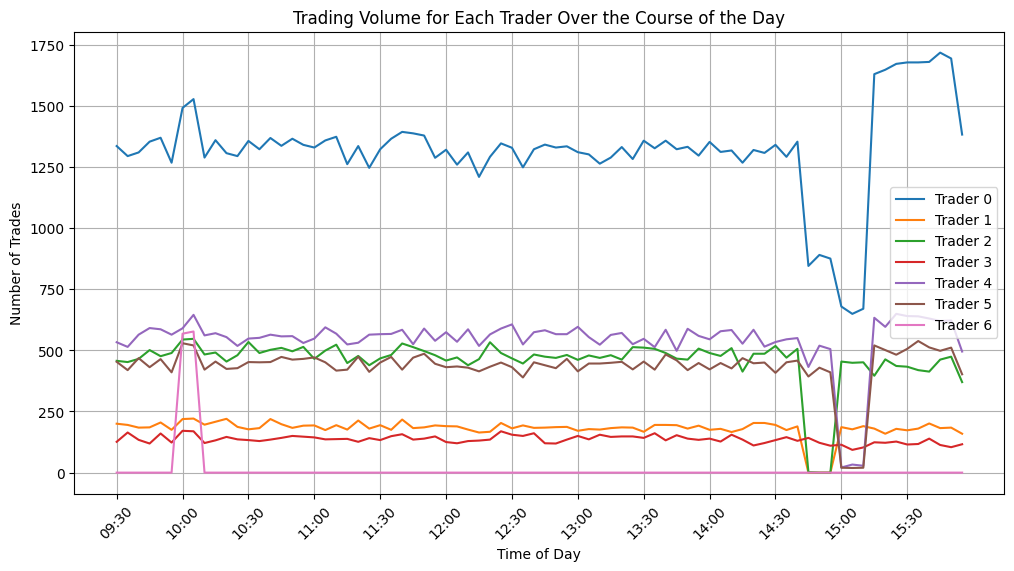

In [40]:
import matplotlib.pyplot as plt

# Convert the index (time) to a proper datetime format for plotting
trader_activity_5min.index = pd.to_datetime(trader_activity_5min.index, format="%H:%M:%S")
trader_activity_5min = trader_activity_5min.sort_index()
# Plot trading volume over the course of the day for each trader
plt.figure(figsize=(12, 6))

for trader in trader_activity_5min.columns:
    plt.plot(trader_activity_5min.index, trader_activity_5min[trader], label=f"Trader {trader}")

# Formatting the plot
plt.xlabel("Time of Day")
plt.ylabel("Number of Trades")
plt.title("Trading Volume for Each Trader Over the Course of the Day")
plt.legend()

plt.xticks(trader_activity_5min.index[::6], trader_activity_5min.index.strftime("%H:%M")[::6], rotation=45)
plt.grid()

# Show the plot
plt.show()


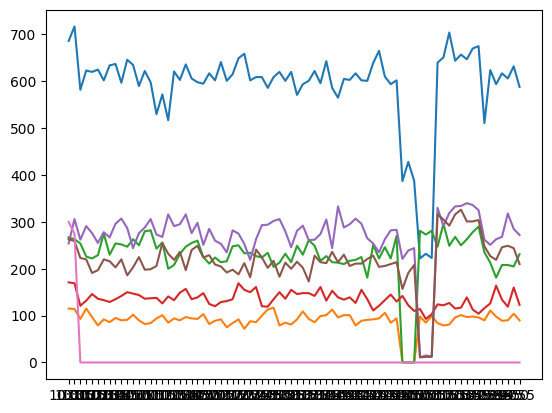

In [42]:
for trader in buy_activity_5min.columns:
    plt.plot(buy_activity_5min.index, buy_activity_5min[trader], label=f"Trader {trader}")

plt.show()